In [1]:
import pandas
import numpy as np
import cv2
import os

In [23]:
#     def kelas (file):
#         if 'ha' in file: dot=1
#         if 'na' in file: dot=2
#         if 'ca' in file: dot=3
#         if 'ra' in file: dot=4
#         if 'ka' in file: dot=5
#         if 'da' in file: dot=6
#         if 'ta' in file: dot=7
#         if 'sa' in file: dot=8
#         if 'wa' in file: dot=9
#         if 'la' in file: dot=10
#         if 'ma' in file: dot=11
#         if 'ga' in file: dot=12
#         if 'ba' in file: dot=13
#         if 'nga' in file: dot=14
#         if 'pa' in file: dot=15
#         if 'ja' in file: dot=16
#         if 'ya' in file: dot=17
#         if 'nya' in file: dot=18
#         return (dot-1)

#     def minmax (img):#normalisasi min max
#         x,y = img.shape
#         balik = np.zeros(img.shape)
#         maks  = max(img.flatten())
#         mins = min(img.flatten())
#         for i in range(x):
#             for j in range (y):
#                 balik[i,j]=(img[i,j]-mins)/(maks-mins)
#         return balik

In [24]:
# filepath = "D:\\cross"

# traindata = []
# trainlabel =[]
# testdata =[]
# testlabel =[]
# for a in os.listdir(filepath):
#     c = 1
#     for b in os.listdir(filepath + "\\" + str(a)):
#         for nama in os.listdir(filepath + "\\" + str(a) + "\\" + str(b)):
#             if (int(a)<=2):
#                 img= cv2.imread(filepath + "\\" + str(a) + "\\" + str(b)+ "\\" + str(nama),0)#grayscale
#                 x = cv2.resize(img,(64,64))#resize
#                 x = minmax(x)
#                 testdata.append(x)
#                 testlabel.append(kelas (nama))
#             else :
#                 img= cv2.imread(filepath + "\\" + str(a) + "\\" + str(b)+ "\\" + str(nama),0)#grayscale
#                 x = cv2.resize(img,(64,64))#resize
#                 x = minmax(x)
#                 traindata.append(x)
#                 trainlabel.append(kelas (nama))

In [25]:
# testlabel= np.array(testlabel)
# trainlabel = np.array(trainlabel)

In [26]:
# print(np.array(dt).shape)
# from sklearn.model_selection import train_test_split

# x1,x2,y1,y2= train_test_split(dt,ID,test_size=0.2)

In [27]:
# dtrain = np.array(x1)
# dlabel = np.array(y1)
# ttrain = np.array(x2)
# tlabel = np.array(y2)
# print(dtrain.shape, ttrain.shape)

In [28]:
# fdtrain = np.zeros ((8640,64,64,1))
# fdtrain[:,:,:,0] = traindata
# fttrain = np.zeros ((2160,64,64,1))
# fttrain[:,:,:,0] = testdata
# fdtrain.shape

# TRAIN GENERATOR

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    horizontal_flip = False,
                    fill_mode = 'wrap',
                    validation_split=0.2)


In [3]:
fpath = "D:\\data"
train_generator = train_datagen.flow_from_directory(
                  fpath,
                  #color_mode='grayscale',
                  target_size = (64,64),
                  subset='training')

validation_generator = train_datagen.flow_from_directory(
                  fpath,
                  #color_mode='grayscale',
                  target_size = (64,64),
                  subset='validation'
)

Found 8640 images belonging to 18 classes.
Found 2160 images belonging to 18 classes.


In [42]:
# np.array(train_generator).shape

# import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(128, (5, 5), activation='relu',padding='same', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (5, 5),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(18, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [7]:
# from keras.callbacks import Callback
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
# class Metrics(Callback):
    
#     def on_train_begin(self, logs={}):
#         self.val_accuracy = []
#         self.val_recalls = []

#         self.val_precisions = []
        
#     def on_epoch_begin(self, epoch, logs=None):
#         pass

#     def on_epoch_end(self, epoch, logs={}):
#         val_predict = model.predict_classes(validation_generator, verbose=0)
#         val_targ = validation_generator.class_indices
        
#         _val_recall = recall_score(val_targ, val_predict, average='weighted')
#         _val_precision = precision_score(val_targ, val_predict, average='weighted')
#         _val_accuracy = accuracy_score(val_targ, val_predict)
        
#         self.val_recalls.append(_val_recall)
#         self.val_precisions.append(_val_precision)
#         self.val_accuracy.append(_val_accuracy)
        
#         print ("\n\n * val_accuracy: %f — val_precision: %f — val_recall %f" %(_val_accuracy, _val_precision, _val_recall), "\n \n")
#         return
    
    
# met = Metrics()

In [7]:
import tensorflow as tf
from tensorflow import keras
import time

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
mulai = time.time()
history = model.fit(train_generator,
    steps_per_epoch = 100,      
    #batch_size=60,
    epochs = 10,
    validation_data = validation_generator
    )
print("waktu training adalah : ", time.time()-mulai , " s")

Train for 100 steps, validate for 68 steps
Epoch 1/10
100/100 [==============================] - 404s 4s/step - loss: 2.3916 - accuracy: 0.2447 - precision: 0.5642 - recall: 0.0769 - val_loss: 1.0817 - val_accuracy: 0.6583 - val_precision: 0.7728 - val_recall: 0.4236
Epoch 2/10
100/100 [==============================] - 524s 5s/step - loss: 1.1291 - accuracy: 0.6328 - precision: 0.7873 - recall: 0.4834 - val_loss: 0.5379 - val_accuracy: 0.8250 - val_precision: 0.8745 - val_recall: 0.7551
Epoch 3/10
100/100 [==============================] - 550s 6s/step - loss: 0.7192 - accuracy: 0.7725 - precision: 0.8562 - recall: 0.7053 - val_loss: 0.4274 - val_accuracy: 0.8657 - val_precision: 0.8911 - val_recall: 0.8296
Epoch 4/10
100/100 [==============================] - 629s 6s/step - loss: 0.5279 - accuracy: 0.8338 - precision: 0.8908 - recall: 0.7875 - val_loss: 0.4140 - val_accuracy: 0.8625 - val_precision: 0.8945 - val_recall: 0.8282
Epoch 5/10
100/100 [==============================] - 750

In [ ]:
# train_generator = train_datagen.flow_from_directory(
#                   fpath,
#                   color_mode='grayscale',
#                   target_size = (96,96),
#                   subset='training')

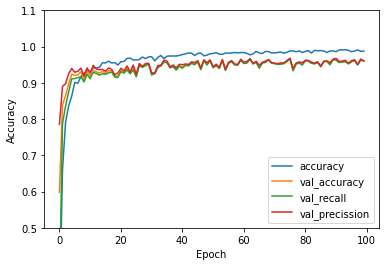

In [58]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(np.array(history.history['val_recall_7']), label = 'val_recall')
plt.plot(np.array(history.history['val_precision_7']), label = 'val_precission')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(validation_generator,  validation_generator.label, verbose=2)

# convert

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

# model_path = '../out/modeltf.h5'
# model.save(model_path)

2.0.0


In [8]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("../out/convert_rgb.tflite", "wb").write(tflite_model)

20106504

In [1]:
# # yhat_classes = model.predict_classes(fttrain, verbose=0)
# # yhat_classes
import tensorflow as tf
new_model = tf.keras.models.load_model('../RGB/100epoch.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [5]:
import time
mulai = time.time()
a = new_model.predict(train_generator)
print("waktu training adalah : ", time.time()-mulai , " s")
mulai = time.time()
b = new_model.predict(validation_generator)
print("waktu testing adalah : ", time.time()-mulai , " s")

waktu training adalah :  95.15513634681702  s
waktu testing adalah :  15.257386922836304  s


In [6]:
print(a)
print(b)

[[3.13875118e-31 0.00000000e+00 0.00000000e+00 ... 3.01117399e-36
  0.00000000e+00 4.25353247e-38]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.02369438e-23 0.00000000e+00]
 [4.07398182e-14 2.53684172e-13 5.65528246e-09 ... 3.11817655e-11
  1.00245925e-05 2.36464330e-04]
 ...
 [1.39295695e-22 1.00000000e+00 7.09695200e-26 ... 1.93680751e-23
  1.45627667e-19 2.89075902e-31]
 [3.77392415e-34 7.53835687e-30 2.85509208e-20 ... 2.08017846e-20
  3.94960094e-24 1.00000000e+00]
 [0.00000000e+00 3.96664948e-23 1.00000000e+00 ... 6.93065320e-17
  3.35239182e-24 2.72576423e-18]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  7.8799884e-24 0.0000000e+00]
 [2.0586160e-31 1.3203130e-25 3.8234802e-20 ... 4.7076424e-14
  3.3428508e-25 2.9671323e-17]
 [3.8362553e-09 9.9999976e-01 7.5898151e-12 ... 4.8139975e-10
  2.1943918e-09 9.2664002e-14]
 ...
 [1.9334145e-09 1.1586326e-21 3.2097291e-24 ... 4.9954264e-18
  4.3707889e-18 4.9681455e-22]
 [1.0000000e+00 1.88062

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


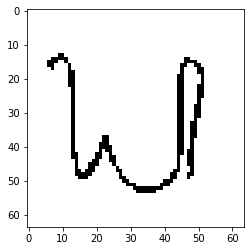

In [6]:
# new_model.predict(train_generator)
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

img = image.load_img("D:\\data\\ya\\ya(1).png.png", target_size=(64,64));
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x.shape()

classes = new_model.predict(x)
print (classes)

In [7]:
def huruf (nilai) :
    balik=0;
    nilai = np.array(nilai)
#     print (nilai.shape())
    
    for i in range (18):
        if (nilai[0][i]==1): 
            balik=i;
     
    if (balik==0): 
            huruf= "ba"
    if (balik==1): 
        huruf= "ca";
    if (balik==2): 
        huruf= "da";
    if (balik==3): 
        huruf= "ga";
    if (balik==4): 
        huruf= "ha";
    if (balik==5): 
        huruf= "ja";
    if (balik==6): 
        huruf= "ka";
    if (balik==7): 
        huruf= "la";
    if (balik==8): 
        huruf= "ma";
    if (balik==9): 
        huruf= "na";
    if (balik==10): 
        huruf= "nga";
    if (balik==11): 
        huruf= "nya";
    if (balik==12): 
        huruf= "pa";
    if (balik==13): 
        huruf= "ra";
    if (balik==14): 
        huruf= "sa";
    if (balik==15): 
        huruf= "ta";
    if (balik==16): 
        huruf= "wa";
    if (balik==17): 
        huruf= "ya";
    return huruf;


[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
ma 8


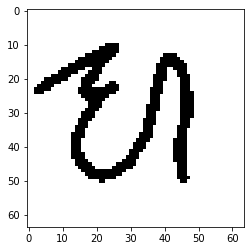

In [26]:
img = image.load_img("E:\\Tugas Akhir\\Testing\\Gambar\\Dimas Yudistira\\Huruf56.png", target_size=(64,64));
imgplot = plt.imshow(img, "gray")
x = image.img_to_array(img)
#x=x/255
x = np.expand_dims(x, axis=0)
def mac(yo):
    balik =0;
    for i in range(18):
        if (yo[0,balik]<yo[0,i]):
            balik =i;
    return balik;
classes = new_model.predict(x)
#classes =np.round(classes)
print (classes)
print (huruf(classes), mac(classes))

Huruf10.png  =  da
Huruf11.png  =  ha
Huruf12.png  =  na
Huruf13.png  =  na
Huruf14.png  =  na
Huruf15.png  =  da
Huruf16.png  =  na
Huruf17.png  =  ja
Huruf18.png  =  da
Huruf19.png  =  ja
Huruf20.png  =  ja
Huruf21.png  =  na
Huruf25.png  =  ja
Huruf26.png  =  ja
Huruf27.png  =  ra
Huruf28.png  =  ja
Huruf29.png  =  ja
Huruf30.png  =  ca
Huruf31.png  =  ka
Huruf32.png  =  ka
Huruf33.png  =  ka
Huruf34.png  =  ka
Huruf35.png  =  da
Huruf36.png  =  ya
Huruf37.png  =  da
Huruf38.png  =  na
Huruf39.png  =  da
Huruf40.png  =  ta
Huruf41.png  =  ta
Huruf42.png  =  ta
Huruf43.png  =  ta
Huruf44.png  =  ta
Huruf45.png  =  ca
Huruf46.png  =  na
Huruf47.png  =  sa
Huruf48.png  =  ca
Huruf49.png  =  na
Huruf50.png  =  la
Huruf51.png  =  ga
Huruf52.png  =  ja
Huruf53.png  =  la
Huruf54.png  =  ja
Huruf55.png  =  ma
Huruf56.png  =  ma
Huruf57.png  =  ja
Huruf58.png  =  nga
Huruf59.png  =  da
Huruf60.png  =  ja
Huruf61.png  =  nga
Huruf62.png  =  ja
Huruf63.png  =  nga
Huruf64.png  =  nga
Huruf65.

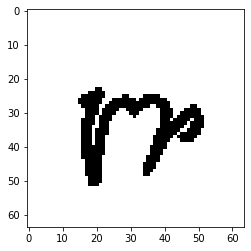

In [58]:
import os
filepath="E:\\Tugas Akhir\\Testing\\Fix\\ega\\"
for a in os.listdir(filepath):
    img = image.load_img(filepath+a, target_size=(64,64));
    imgplot = plt.imshow(img, "gray")
    x = image.img_to_array(img)
    #x=x/255
    x = np.expand_dims(x, axis=0)

    classes = new_model.predict(x)
    classes =np.round(classes)
#     print (classes)
    print (a , " = ",huruf(classes))
    

'ca'

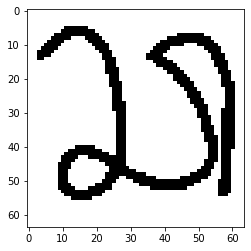

In [28]:
img = image.load_img("D:\\android image\\Huruf17.png", target_size=(64,64), grayscale=True);
#img =  image.load_img("D:\\data\\ca\\ca(1).png.png", target_size=(64,64), grayscale=True);
img = image.img_to_array(img)
imgplot = plt.imshow(img, "gray")
img = np.expand_dims(img, axis=0)

# img2 =  image.load_img("D:\\data\\na\\na(1).png.png", target_size=(64,64), grayscale=True);
# img2 = np.expand_dims(img2, axis=0)
# img2 = np.expand_dims(img2, axis=0)

hasil = new_model.predict(img)

a= np.unique(img);
# b= np.unique(img2);
huruf(hasil)

In [36]:
img = image.load_img("D:\\android image\\Huruf17.png", target_size=(64,64), grayscale=True);
#img =  image.load_img("D:\\data\\ca\\ca(1).png.png", target_size=(64,64), grayscale=True);
img = image.img_to_array(img)
print(img/225)

[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]]


In [ ]:
# import tensorflow as tf

# y_pred=model.predict_classes(fttrain)
# con_mat = tf.math.confusion_matrix(labels=tlabel, predictions=y_pred).numpy()
# con_mat[:3,:3]

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [28]:
def maks(data):
    balik=0
    for i in range(18):
        if (data[balik]<data[i]):
            balik=i
    return balik
hasil=0
for i in range (8000):
    if (maks(a[i])==train_generator.labels[i]):
        hasil+=1
hasil/8000

0.056875

In [10]:
# accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(a, train_generator.labels)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(tlabel, yhat_classes, average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(tlabel, yhat_classes, average='weighted')
# print('Recall: %f' % recall)